In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

#### PCA

Principal Component Analysis (Метод главных компонент)

In [2]:
# столбец 0 - количество комнат
# столбец 1 - площадь дома (в тысячах квадратных футов)
houses = np.array([[5, 1.6],
                   [4, 1.4],
                   [6, 1.9],
                   [3, 1.1],
                   [4, 1.25]])

Text(0, 0.5, 'Площадь дома')

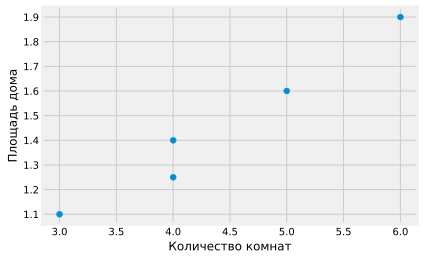

In [3]:
plt.scatter(houses[:, 0], houses[:, 1])
plt.xlabel('Количество комнат')
plt.ylabel('Площадь дома')

По графику видно, что два признака сильно скоррелированы и

их можно расположить вдоль одной прямой,

то есть фактически сжать данные до одного измерения.

Это означает, что данные могут быть представлены одной главной компонентой

с минимальной потерей информации

#### Алгоритм PCA

In [4]:
houses

array([[5.  , 1.6 ],
       [4.  , 1.4 ],
       [6.  , 1.9 ],
       [3.  , 1.1 ],
       [4.  , 1.25]])

Найдем среднее значение для каждого признака

In [5]:
mean_values = np.mean(houses, axis=0)
mean_values

array([4.4 , 1.45])

Отнимем от значений признаков средние значения

In [6]:
houses_centered = houses - mean_values
houses_centered

array([[ 0.6 ,  0.15],
       [-0.4 , -0.05],
       [ 1.6 ,  0.45],
       [-1.4 , -0.35],
       [-0.4 , -0.2 ]])

Найдем величину ковариаций

(матрица ковариаций - матрица, состоящая из попарных ковариаций признаков)

In [7]:
covarience_matrix = np.cov(houses_centered.T)
covarience_matrix

array([[1.3   , 0.35  ],
       [0.35  , 0.0975]])

In [8]:
# Проверка правильности найденной матрицы - найдем дисперсии централизованных признаков,
# они должны совпадать по значению с главной диагональю ковариационной матрицы
print(np.var(houses_centered[:, 0], ddof=1))
print(np.var(houses_centered[:, 1], ddof=1))

1.3
0.09749999999999998


Найдем собственные значения (eigenvalues)

и собственные векторы (eigenvectors) матрицы ковариаций

In [9]:
eigenvalues, eigenvectors = np.linalg.eig(covarience_matrix)
eigenvalues

array([1.39445221, 0.00304779])

In [10]:
eigenvectors

array([[ 0.96546225, -0.26054298],
       [ 0.26054298,  0.96546225]])

Собственные значения (eigenvalues) сильно отличаются -

eigenvalues[0] намного больше, чем eigenvalues[1],

поэтому оставим только собственный вектор из столбца 0 массива eigenvectors.

То есть eigenvectors[:, 0].

Умножим центрированные данные на этот вектор.

In [11]:
result_pre = np.dot(houses_centered, eigenvectors[:, 0])
result = result_pre.reshape(-1, 1)
result

array([[ 0.6183588 ],
       [-0.39921205],
       [ 1.66198394],
       [-1.44283719],
       [-0.4382935 ]])

Сравнение c результатом вычислений в библиотеке sklearn

In [12]:
from sklearn.decomposition import PCA

In [13]:
pca = PCA(n_components=1)

In [14]:
mc = pca.fit_transform(houses)
mc

array([[ 0.6183588 ],
       [-0.39921205],
       [ 1.66198394],
       [-1.44283719],
       [-0.4382935 ]])

In [15]:
pca.explained_variance_ratio_

array([0.99781911])

#### Применение PCA в моделях машинного обучения

Загрузим сохраненные нами данные по пассажирам Титаника

In [16]:
x_train = pd.read_pickle('../Lesson3/x_train.pkl')
y_train = pd.read_pickle('../Lesson3/y_train.pkl')

In [17]:
x_valid = pd.read_pickle('../Lesson3/x_valid.pkl')
y_valid = pd.read_pickle('../Lesson3/y_valid.pkl')

In [18]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 668 entries, 299 to 103
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Sex         668 non-null    int32  
 1   Age         668 non-null    float64
 2   SibSp       668 non-null    int64  
 3   Parch       668 non-null    int64  
 4   Fare        668 non-null    float64
 5   Embarked_C  668 non-null    uint8  
 6   Embarked_Q  668 non-null    uint8  
 7   Embarked_S  668 non-null    uint8  
 8   Pclass_1    668 non-null    uint8  
 9   Pclass_2    668 non-null    uint8  
 10  Pclass_3    668 non-null    uint8  
dtypes: float64(2), int32(1), int64(2), uint8(6)
memory usage: 48.8 KB


In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler = StandardScaler(with_mean=False)

x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)

x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_valid_scaled = pd.DataFrame(x_valid_scaled, columns=x_train.columns)

Сначала мы не будем указывать число компонент (по умолчанию все компоненты будут сохранены)

In [21]:
pca = PCA(random_state=100)



In [22]:
pca.fit(x_train_scaled)

PCA(random_state=100)

In [23]:
pca.explained_variance_ratio_

array([2.22480052e-01, 1.80579178e-01, 1.61196472e-01, 1.18874068e-01,
       9.43088132e-02, 7.61203186e-02, 6.30288483e-02, 4.72728880e-02,
       3.61393615e-02, 4.62903554e-32, 1.40519782e-32])

In [24]:
np.sum(pca.explained_variance_ratio_[:7])

0.9165877504406761

Оставим только 7 главных компонент



In [25]:
pca = PCA(n_components=7, random_state=100)
x_train_mc = pca.fit_transform(x_train_scaled)

In [26]:
x_valid_mc = pca.transform(x_valid_scaled)

Построим модель логистической регрессии



In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
lr = LogisticRegression()

In [29]:
lr.fit(x_train_mc, y_train)

LogisticRegression()

In [30]:
y_pred = lr.predict(x_valid_mc)

In [31]:
from sklearn.metrics import accuracy_score

In [32]:
accuracy_score(y_valid, y_pred)

0.8026905829596412